In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import Image

my_dpi = 192

In [23]:
# Load in array of 201 images, create dataframe
phi = np.load("Phi_201snap.npy")
df = pd.DataFrame(columns=['norm'], index=np.arange(201))

r = np.linspace(1, 101, 101)
theta = np.linspace(0, 2 * np.pi, 227)
r_grid, theta_grid = np.meshgrid(r, theta, indexing='ij')

# Convert polar coordinates to Cartesian coordinates
x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)

# Define the target grid for interpolation (203x203 pixels)
grid_x, grid_y = np.linspace(-101, 101, 203), np.linspace(-101, 101, 203)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

points = np.array([x.flatten(), y.flatten()]).T

for i in range(201):
    arr = phi[:,:,i]
    values = arr.flatten()
    
    # Interpolate the data to the Cartesian grid
    grid_z = griddata(points, values, (grid_x, grid_y), method='nearest')
    
    # Plot and save image --> Open JPG, convert to np array just like before, then use that instead of grid_z below.
    plt.figure(figsize=(264/my_dpi, 264/my_dpi), dpi=my_dpi)
    plt.imshow(grid_z, extent=(-101, 101, -101, 101), cmap='gray')
    plt.axis("off")
    plt.savefig('analysis2.2.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()
    im = Image.open('analysis2.2.jpg')
    im_array = np.asarray(im)

    # Create convert function to use to convert im_array back to raw values
    phimax, phimin = np.max(grid_z), np.min(grid_z)
    ratio = (phimax-phimin)/255
    def convertRGBToRaw(x):
        return ratio*x + phimin

    # Loop through im_array and replace RGB by raw in copy
    copy = grid_z.copy()
    for i, row in enumerate(im_array):
        for j, col in enumerate(row):
            copy[i][j] = convertRGBToRaw(col[0])
    
    output_array = np.zeros((101, 227))
    for rad in range(101):
        for ang in range(227):
            # Polar coordinates
            radius = r[rad]
            angle = theta[ang]
            
            # Convert to Cartesian coordinates
            x_cart = radius * np.cos(angle)
            y_cart = radius * np.sin(angle)
            
            # Find the nearest pixel in the Cartesian grid
            x_nearest = np.argmin(np.abs(grid_x[0] - x_cart))
            y_nearest = np.argmin(np.abs(grid_y[:, 0] - y_cart))
            
            # Get the raw values from copy and put into output array
            output_array[rad, ang] = copy[y_nearest, x_nearest]
            
    # Compute norm, add to dataframe
    diff_array = output_array - arr
    norm = np.linalg.norm(diff_array)
    df.at[i, 'norm'] = norm
df

,norm
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
197,NaN
198,NaN
199,NaN
200,NaN


0.3563949661550071

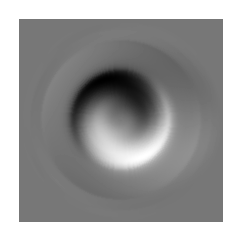

In [21]:
# Testing single images
i = 160

phi = np.load("Phi_201snap.npy")
r = np.linspace(1, 101, 101)
theta = np.linspace(0, 2 * np.pi, 227)
r_grid, theta_grid = np.meshgrid(r, theta, indexing='ij')

# Convert polar coordinates to Cartesian coordinates
x = r_grid * np.cos(theta_grid)
y = r_grid * np.sin(theta_grid)

# Define the target grid for interpolation (203x203 pixels)
grid_x, grid_y = np.linspace(-101, 101, 203), np.linspace(-101, 101, 203)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

points = np.array([x.flatten(), y.flatten()]).T

arr = phi[:,:,i]
values = arr.flatten()
    
# Interpolate the data to the Cartesian grid
grid_z = griddata(points, values, (grid_x, grid_y), method='nearest')
    
# Plot and save image
plt.figure(figsize=(264/my_dpi, 264/my_dpi), dpi=my_dpi)
plt.imshow(grid_z, extent=(-101, 101, -101, 101), cmap='gray')
plt.axis("off")
plt.savefig('analysis2.2.jpg', bbox_inches='tight', pad_inches=0)
im = Image.open('analysis2.2.jpg')
im_array = np.asarray(im)

# Create convert function to use to convert im_array back to raw values
phimax, phimin = np.max(grid_z), np.min(grid_z)
ratio = (phimax-phimin)/255
def convertRGBToRaw(x):
    return ratio*x + phimin

# Loop through im_array and replace RGB by raw in copy
copy = grid_z.copy()
for i, row in enumerate(im_array):
    for j, col in enumerate(row):
        copy[i][j] = convertRGBToRaw(col[0])

output_array = np.zeros((101, 227))
for rad in range(101):
    for ang in range(227):
        # Polar coordinates
        radius = r[rad]
        angle = theta[ang]
            
        # Convert to Cartesian coordinates
        x_cart = radius * np.cos(angle)
        y_cart = radius * np.sin(angle)
            
        # Find the nearest pixel in the Cartesian grid
        x_nearest = np.argmin(np.abs(grid_x[0] - x_cart))
        y_nearest = np.argmin(np.abs(grid_y[:, 0] - y_cart))
            
        # Get the raw values from copy and put into output array
        output_array[rad, ang] = copy[y_nearest, x_nearest]
        
# Compute norm, add to dataframe
diff_array = output_array - arr
norm = np.linalg.norm(diff_array)
norm

In [17]:
im_array.shape

(101, 227, 3)

In [18]:
copy.shape

(203, 203)

In [19]:
grid_z.shape

(203, 203)